# Integrated shear strength

Show variations in strength with age, spreading rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from litho import Litho
import pandas as pd
%matplotlib inline

In [2]:
myLith = Litho(crust_flow=1)
myLith.print_vals()

Crustal Thickness:   6.0 km
Crustal Flow Law:    Wet Olivine
Full Spreading Rate: 4.0 cm/yr
Plate Thickness:     125.0 km
Ridge Axis Depth:    2.6 km


We can integrate the shear strength over the thickness of the elastic plate for a total strength estimate. We'll do this for a range of ages to see how strength evolves with time.

In [3]:
ages = [0.125, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4]
n = len(ages)
strength_wet = np.zeros(n)
strength_dry = np.zeros(n)

for i, age in enumerate(ages):
    setattr(myLith,'crust_flow',1)
    _, _, yseS = myLith.get_yse(age,thermal=2)
    strength_wet[i] = np.trapz(yseS,myLith.z)
    setattr(myLith,'crust_flow',0)
    _, _, yseS = myLith.get_yse(age,thermal=2)
    strength_dry[i] = np.trapz(yseS,myLith.z)
    

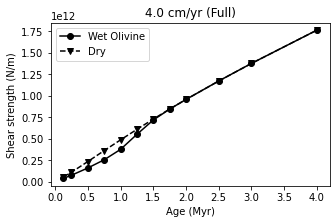

In [4]:
fig, ax = plt.subplots(figsize=(5.0, 3.0))
ax.plot(ages,strength_wet,'ko-',label='Wet Olivine')
ax.plot(ages,strength_dry,'kv--',label='Dry')
ax.set_xlabel('Age (Myr)')
ax.set_ylabel('Shear strength (N/m)')
ax.set_title('{} cm/yr (Full)'.format(myLith.usp*100))
ax.legend()
plt.show()

For the given spreading rate, the integrated shear strength in basically linear with age when the crustal flow law is the same as the mantle (dry olivine). When we change the crustal flow law to wet olivine, the plate is slightly weaker for the first 1.5 Myr.

---

Let's see what happens when we vary the spreading rate. First, we'll cover the whole range from ultraslow to fast. Then we can zoom in if we need to.

In [116]:
myLith = Litho(crust_flow=1)
ages = [0.125, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4]
rates = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1] # full spreading rate in m/yr
n = len(ages)
m = len(rates)
strength = np.zeros((m,n))
for j, rate in enumerate(rates):
    setattr(myLith,'usp',rate)
    for i, age in enumerate(ages):
        _, _, yseS = myLith.get_yse(age,thermal=2)
        strength[j,i] = np.trapz(yseS,myLith.z)

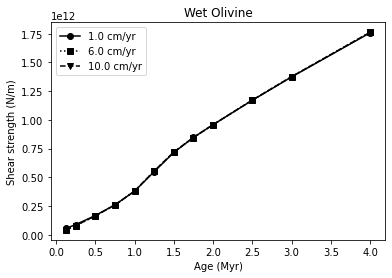

In [28]:
fig, ax = plt.subplots(figsize=(6.0, 4.0))
ax.plot(ages,strength[0,:],'ko-',label=f'{rates[0]*100} cm/yr')
ax.plot(ages,strength[3,:],'ks:',label=f'{rates[3]*100} cm/yr')
ax.plot(ages,strength[5,:],'kv--',label=f'{rates[5]*100} cm/yr')
ax.set_xlabel('Age (Myr)')
ax.set_ylabel('Shear strength (N/m)')
ax.set_title('Wet Olivine')
ax.legend()
plt.show()

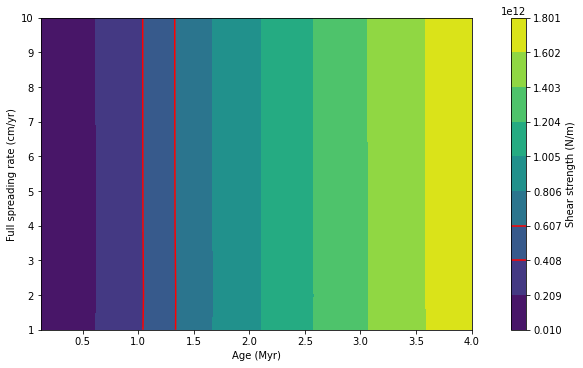

In [119]:
AGE, RATE = np.meshgrid(ages,np.asarray(rates)*100)
fig, ax = plt.subplots(figsize=(8.0, 5.0),constrained_layout=True)
levels = 1e10*np.linspace(1,200,num=10,endpoint=False)
CS = ax.contourf(AGE, RATE, strength, levels, cmap=plt.cm.viridis)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Shear strength (N/m)')
CS2 = ax.contour(CS, levels=levels[2:4],colors='r')
cbar.add_lines(CS2)
ax.set_xlabel('Age (Myr)')
ax.set_ylabel('Full spreading rate (cm/yr)')
plt.show()

For a given age, there's little to no variation in shear strength with spreading rate, even across the whole spectrum of spreading rates. If we were using the plate (or half space) cooling model, we would see exactly zero variation in strength with spreading rate-- only the Sleep model accounts for the influence of spreading rate. The variation in strength we do see is at very small age, and this is where the thermal models differ. Let's zoom in on stuff younger than 500 kyr.

In [120]:
myLith = Litho(crust_flow=1)
ages = np.linspace(0.01,0.5,num=20)
rates = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1] # full spreading rate in m/yr
n = len(ages)
m = len(rates)
strength = np.zeros((m,n))
for j, rate in enumerate(rates):
    setattr(myLith,'usp',rate)
    for i, age in enumerate(ages):
        _, _, yseS = myLith.get_yse(age,thermal=2)
        strength[j,i] = np.trapz(yseS,myLith.z)

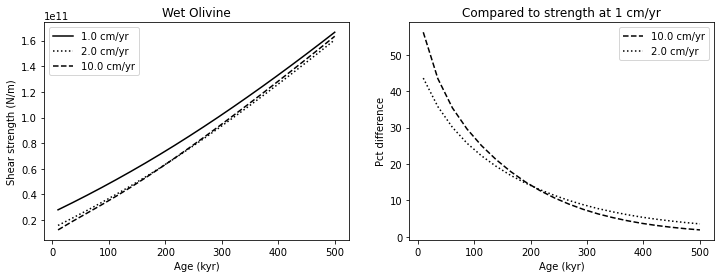

In [121]:
fig, ax = plt.subplots(1,2,figsize=(12.0, 4.0))
ax[0].plot(ages*1e3,strength[0,:],'k-',label=f'{rates[0]*100} cm/yr')
ax[0].plot(ages*1e3,strength[1,:],'k:',label=f'{rates[1]*100} cm/yr')
ax[0].plot(ages*1e3,strength[5,:],'k--',label=f'{rates[5]*100} cm/yr')
ax[0].set_xlabel('Age (kyr)')
ax[0].set_ylabel('Shear strength (N/m)')
ax[0].set_title('Wet Olivine')
ax[0].legend()

ax[1].plot(ages*1e3,100*np.abs(strength[0,:] - strength[5,:])/strength[0,:],'k--',label=f'{rates[5]*100} cm/yr')
ax[1].plot(ages*1e3,100*np.abs(strength[0,:] - strength[1,:])/strength[0,:],'k:',label=f'{rates[1]*100} cm/yr')
ax[1].set_xlabel('Age (kyr)')
ax[1].set_ylabel('Pct difference')
ax[1].set_title('Compared to strength at 1 cm/yr')
ax[1].legend()
plt.show()

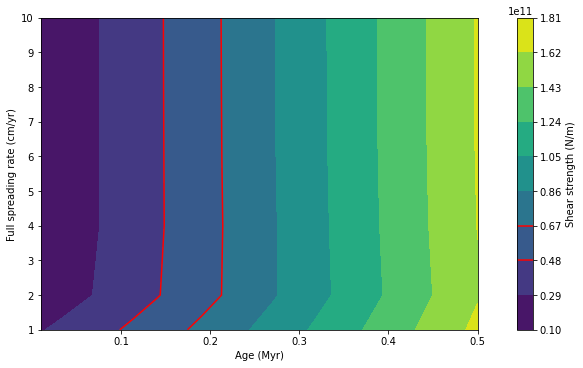

In [122]:
AGE, RATE = np.meshgrid(ages,np.asarray(rates)*100)
fig, ax = plt.subplots(figsize=(8.0, 5.0),constrained_layout=True)
levels = 1e10*np.linspace(1,20,num=10,endpoint=False)
CS = ax.contourf(AGE, RATE, strength, levels, cmap=plt.cm.viridis)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Shear strength (N/m)')
CS2 = ax.contour(CS, levels=levels[2:4],colors='r')
cbar.add_lines(CS2)
ax.set_xlabel('Age (Myr)')
ax.set_ylabel('Full spreading rate (cm/yr)')
plt.show()

The takeaway here is that, with respect to age, only for the lowest spreading rates at earliest stages is the strength influenced by spreading rate.

---
## Distance, not age

Let's translate the age to a distance from the spreading axis based on the spreading rate. Instead of prescribing ages, we'll give a distance from the axis and compare the strength at common distances. First, I'll display a lookup table for convenience.

In [2]:
ages = np.array([0.125, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 4]) # in Myr
rates = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]) # full spreading rate in m/yr
dist_table = np.outer(ages*1e6,rates) # distances in m

In [13]:
df = pd.DataFrame(
    dist_table*1e-3,
    index=pd.Index(ages,name='Age (Myr)'),
    columns=pd.Index((rates*100).astype('int32'),name='Full Rate (cm/yr)')
)
print("Distance from axis in km")
df.style.format('{:g}')
#df.to_csv('age-rate-dist.csv')

Distance from axis in km


Full Rate (cm/yr),1,2,3,4,5,6,7,8,9,10
Age (Myr),,,,,,,,,,
0.125,1.25,2.5,3.75,5,6.25,7.5,8.75,10,11.25,12.5
0.25,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25
0.5,5,10,15,20,25,30,35,40,45,50
0.75,7.5,15,22.5,30,37.5,45,52.5,60,67.5,75
1.0,10,20,30,40,50,60,70,80,90,100
1.25,12.5,25,37.5,50,62.5,75,87.5,100,112.5,125
1.5,15,30,45,60,75,90,105,120,135,150
1.75,17.5,35,52.5,70,87.5,105,122.5,140,157.5,175
2.0,20,40,60,80,100,120,140,160,180,200


In [97]:
distances = np.linspace(dist_table.min(),dist_table.max(),num=20)

In [98]:
myLith = Litho(crust_flow=1)
n = len(distances)
m = len(rates)
strength = np.zeros((m,n))
for j, rate in enumerate(rates):
    setattr(myLith,'usp',rate)
    for i, distance in enumerate(distances):
        age = (distance/rate)*1e-6
        _, _, yseS = myLith.get_yse(age,thermal=2)
        strength[j,i] = np.trapz(yseS,myLith.z)

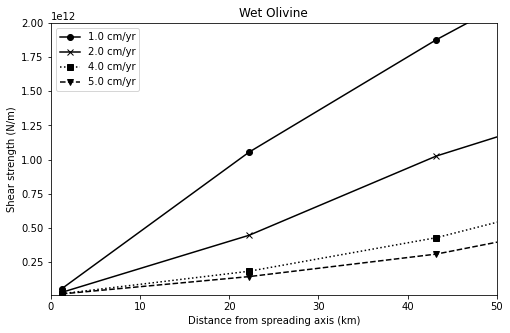

In [99]:
fig, ax = plt.subplots(figsize=(8.0, 5.0))
ax.plot(distances*1e-3,strength[0,:],'ko-',label=f'{rates[0]*100} cm/yr')
ax.plot(distances*1e-3,strength[1,:],'kx-',label=f'{rates[1]*100} cm/yr')
ax.plot(distances*1e-3,strength[3,:],'ks:',label=f'{rates[3]*100} cm/yr')
ax.plot(distances*1e-3,strength[4,:],'kv--',label=f'{rates[4]*100} cm/yr')
ax.set_xlabel('Distance from spreading axis (km)')
ax.set_ylabel('Shear strength (N/m)')
ax.set_title('Wet Olivine')
ax.set_xlim(0,50)
ax.set_ylim(1e10,2e12)
ax.legend()
plt.show()

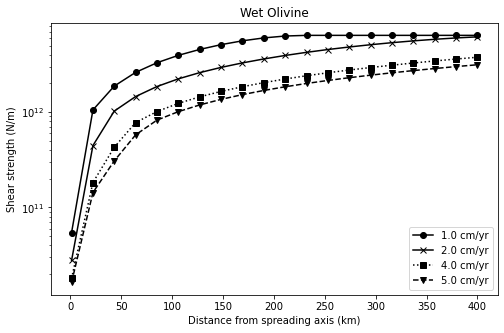

In [100]:
fig, ax = plt.subplots(figsize=(8.0, 5.0))
ax.semilogy(distances*1e-3,strength[0,:],'ko-',label=f'{rates[0]*100} cm/yr')
ax.semilogy(distances*1e-3,strength[1,:],'kx-',label=f'{rates[1]*100} cm/yr')
ax.semilogy(distances*1e-3,strength[3,:],'ks:',label=f'{rates[3]*100} cm/yr')
ax.semilogy(distances*1e-3,strength[4,:],'kv--',label=f'{rates[4]*100} cm/yr')
ax.set_xlabel('Distance from spreading axis (km)')
ax.set_ylabel('Shear strength (N/m)')
ax.set_title('Wet Olivine')
#ax.set_xlim(0,50)
#ax.set_ylim(1e10,2e12)
ax.legend()
plt.show()

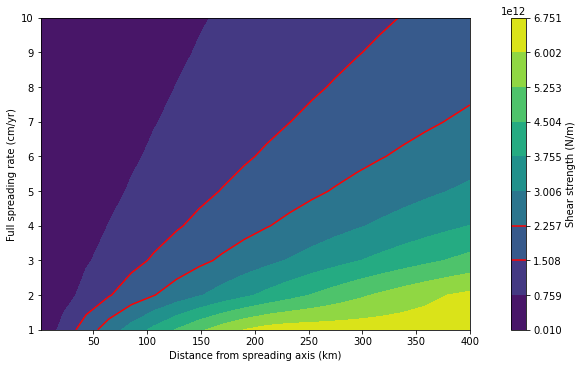

In [115]:
DIST, RATE = np.meshgrid(distances*1e-3,rates*100)
fig, ax = plt.subplots(figsize=(8.0, 5.0),constrained_layout=True)
levels = 1e10*np.linspace(1,750,num=10,endpoint=False)
CS = ax.contourf(DIST, RATE, strength, levels, cmap=plt.cm.viridis)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Shear strength (N/m)')
CS2 = ax.contour(CS, levels=levels[2:4],colors='r')
cbar.add_lines(CS2)
ax.set_xlabel('Distance from spreading axis (km)')
ax.set_ylabel('Full spreading rate (cm/yr)')
plt.show()